In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from scipy.stats import norm, kde, kstest
from scipy.stats import poisson

from numpy import inf
import math
from sklearn.cluster import KMeans


In [51]:
GCF08 = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\GC2008.csv")    # General Fund Summary 2008 #
GCF08.drop(['Unnamed: 0'], axis=1,inplace=True)

In [52]:
GCF08_vc = GCF08.word.value_counts()
GCF08_vc.head()

Emergency    48
General      40
Public       36
Attorney     36
Court        36
Name: word, dtype: int64

In [53]:
GCF08.sentiment = GCF08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [54]:
GCF08.head(20)

,page_number,word,sent_count,sentiment,category
0,19,County,20,2,Emotion
1,1,Tax,17,0,Sentiment
2,1,Tax,17,0,Emotion
3,7,Debt,17,0,Sentiment
4,7,Debt,17,0,Emotion
5,7,School,15,2,Emotion
6,3,Tax,14,0,Sentiment
7,3,Tax,14,0,Emotion
8,10,Debt,13,0,Sentiment
9,10,Debt,13,0,Emotion


In [55]:
GCF08.sentiment.value_counts()

1    383
2    267
0    218
3    151
5     96
6     71
8     28
7     28
4     24
Name: sentiment, dtype: int64

In [56]:
GCF08['sentiment'] = pd.to_numeric(GCF08['sentiment'])
GCF08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 5 columns):
page_number    1266 non-null int64
word           1266 non-null object
sent_count     1266 non-null int64
sentiment      1266 non-null int64
category       1266 non-null object
dtypes: int64(3), object(2)
memory usage: 49.5+ KB


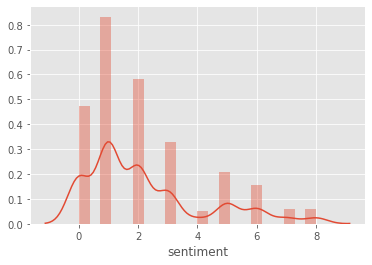

In [57]:
sns.distplot(GCF08.sentiment)

In [58]:
#sen_density = kde.gaussian_kde(GCF08, bw_method=None)

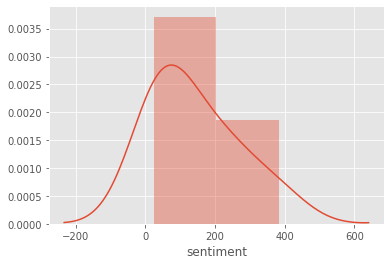

In [59]:
sns.distplot(GCF08.sentiment.value_counts())

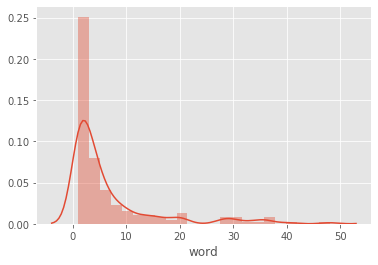

In [60]:
sns.distplot(GCF08_vc)

In [61]:
GCF08.drop("category",axis=1,inplace=True)
GCF08.drop("page_number",axis=1,inplace=True)
GCF08.drop("sent_count",axis=1,inplace=True)

In [62]:
v = GCF08.to_numpy(copy=True)
v

array([['County', 2],
       ['Tax', 0],
       ['Tax', 0],
       ...,
       ['Legal', 2],
       ['Policy', 2],
       ['Resources', 2]], dtype=object)

In [63]:
#clf = KMeans(n_clusters = 8)
#clf.fit(GCF08)

In [64]:
#GCF08.sentiment = GCF08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"1","Sadness":"0","Anticipation":"1","Surprise":"1","Fear":"0","Joy":"1","Anger":"0","Disgust":"0"})

In [65]:
GCF08['sentiment'] = pd.to_numeric(GCF08['sentiment'])
GCF08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
word         1266 non-null object
sentiment    1266 non-null int64
dtypes: int64(1), object(1)
memory usage: 19.9+ KB


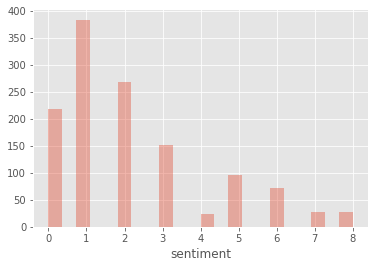

In [66]:
sns.distplot(GCF08.sentiment,kde=False)

In [67]:
#sns.distplot(GCF08.sent_count)

In [68]:
GCF08.tail(20)

,word,sentiment
1246,Resources,2
1247,System,2
1248,Attorney,7
1249,Public,3
1250,Attorney,5
1251,Resources,6
1252,Decrease,0
1253,Tax,0
1254,Attorney,1
1255,Include,1


In [69]:
CCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\FY2008\structured\emotion\CharlotteCityEmotionDataFY08.csv")
CCE.drop(['Unnamed: 0'], axis=1,inplace=True)

In [70]:
CCE.sentiment = CCE.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [71]:
CCE.sentiment = pd.to_numeric(CCE['sentiment'])

In [72]:
sentiment_mean = CCE.sentiment.mean()
sentiment_mean

2.2300422780402887

In [73]:
sentiment_var = CCE.sentiment.var()
sentiment_var

3.986870014379548

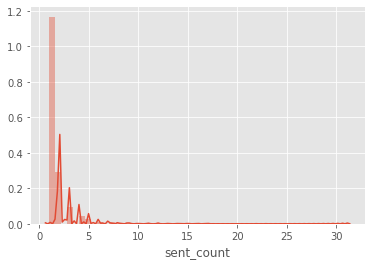

In [74]:
sns.distplot(CCE.sent_count)

In [86]:
data = np.array(CCE.sent_count)   
   
print(kstest(data,'poisson', args=(1,), alternative = 'greater',N=1500))

KstestResult(statistic=0.0, pvalue=1.0)


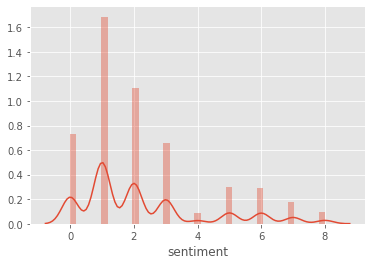

In [76]:
sns.distplot(CCE['sentiment'])

In [77]:
#GCF08

In [78]:
k = np.arange(GCF08['sentiment'].max()+1)

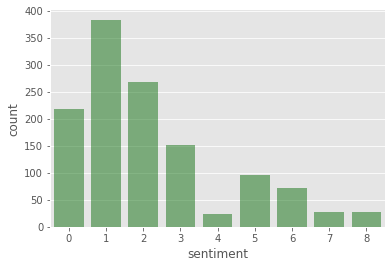

In [79]:
sns.countplot(GCF08['sentiment'], order=k, color='g', alpha=0.5)

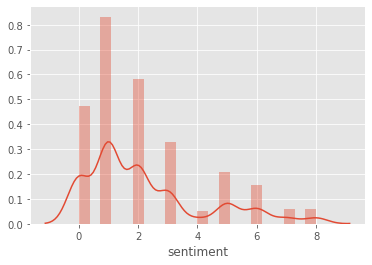

In [80]:
sns.distplot(GCF08['sentiment'])

In [81]:
mlest = GCF08['sentiment'].mean()

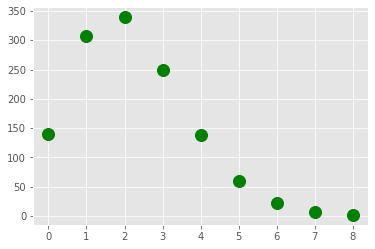

In [82]:
plt.plot(k, poisson.pmf(k, mlest)*len(GCF08['sentiment']), 'go', markersize=12)

In [83]:
data = GCF08['sentiment']
data_size = data.size
data_mean = data.mean
z_critical = poisson.ppf(q = 0.975,mu=1)  # Get the z-critical value*
                        

data_std = data.std()  # Get the population standard deviation

margin_of_error = z_critical * (data_std/math.sqrt(data_size))

#confidence_interval = (data_mean - margin_of_error,
                       #data_mean + margin_of_error)  

print("Sample Mean:")
#print(data_mean)

print("Confidence interval:")
#print(confidence_interval)

Sample Mean:
Confidence interval:


In [84]:
data = np.array(data)   
   
print(kstest(data,'poisson', args=(1,), alternative = 'greater',N=2000))

KstestResult(statistic=1.1252025979846536e-06, pvalue=0.9999988731946702)
